In [271]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout, Activation
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt
import time
import math
import tensorflow as tf

In [272]:
data=pd.read_csv("HistoricalQuotes.csv")
del data['Date']
data.head()

,Close/Last,Volume,Open,High,Low
0,118.03,76322110,118.61,119.82,118.00
1,119.39,74270970,119.55,120.67,118.96
2,120.30,91183020,118.92,120.99,118.15
3,119.26,81688590,119.44,119.67,117.87
4,119.21,103350700,119.62,120.53,118.57


In [273]:
def standard_scaler(Xtraining, Xtesting):
    trainSamples, trainx, trainy = Xtraining.shape
    testSamples, testx, testy = Xtesting.shape
    
    Xtraining = Xtraining.reshape((trainSamples, trainx * trainy))
    Xtesting = Xtesting.reshape((testSamples, testx * testy))
    
    preprocessor = prep.StandardScaler().fit(Xtraining)
    Xtraining = preprocessor.transform(Xtraining)
    Xtesting = preprocessor.transform(Xtesting)
    
    Xtraining = Xtraining.reshape((trainSamples, trainx, trainy))
    Xtesting = Xtesting.reshape((testSamples, testx, testy))
    
    return Xtraining, Xtesting

In [274]:
def preprocess_data(stocks, sequenceLength2):
    AmountofFeatures = len(stocks.columns)
    data = stocks.values
    
    sequenceLength = sequenceLength2 + 1
    result = []
    for index in range(len(data) - sequenceLength):
        result.append(data[index : index + sequenceLength])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    Xtraining = train[:, : -1]
    Ytraining = train[:, -1][: ,-1]
    Xtesting = result[int(row) :, : -1]
    Ytesting = result[int(row) :, -1][ : ,-1]

    Xtraining = np.reshape(Xtraining, (Xtraining.shape[0], Xtraining.shape[1], AmountofFeatures))
    Xtesting = np.reshape(Xtesting, (Xtesting.shape[0], Xtesting.shape[1], AmountofFeatures))  

    return [Xtraining, Ytraining, Xtesting, Ytesting]

In [285]:
def build_model(layers):
   

    # By setting return_sequences to True we are able to stack another LSTM layer
    

    model = Sequential()
    model.add(LSTM(units=100,input_shape=(10,1),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="rmsprop")
    print(model.summary())
    return model
    
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 10, 100)           40800     
_________________________________________________________________
dropout_26 (Dropout)         (None, 10, 100)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_13 (Activation)   (None, 1)                 0         
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________

In [284]:
window = 20
Xtraining, Ytraining, Xtesting, Ytesting = preprocess_data(data[:: -1], window)
print("Xtrain", Xtraining.shape)
print("Ytrain", Ytraining.shape)
print("Xtest", Xtesting.shape)
print("Ytest", Ytesting.shape)


Xtrain (97, 20, 5)
Ytrain (97,)
Xtest (11, 20, 5)
Ytest (11,)


In [277]:
model = build_model([Xtraining.shape[2], window, 1, 1])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 10, 100)           40800     
_________________________________________________________________
dropout_26 (Dropout)         (None, 10, 100)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_13 (Activation)   (None, 1)                 0         
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________________________________

In [278]:
model
model.fit(
    Xtraining,
    Ytraining,
    batch_size=0,
    epochs=0,
    validation_split=0.1,
    verbose=0,
    sample_weight=None)
    

In [279]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))




ValueError: in user code:

    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\lrzma\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:224 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_26: expected shape=(None, None, 1), found shape=[None, 20, 5]


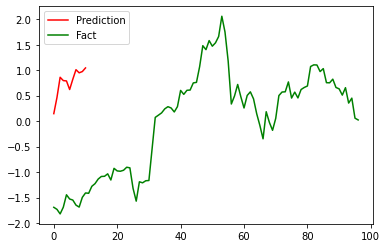

In [270]:
plt.plot(Ytesting, color='red', label='Prediction')
plt.plot(Ytraining, color='green',label='Fact')
plt.legend(loc='upper left')
plt.show()